## **Task-2 Prediction using Unsupervised ML**

This task is part of the internship with The Sparks Foundation. I have been tasked to predict the optimum number of clusters
and represent it visually.

### Author: Disha Dutta

**Step 1 - Importing all the required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from google.colab import files
from sklearn.cluster import KMeans

**Step 2 - Loading the iris dataset**

In [2]:
uploaded = files.upload()
dt = pd.read_csv('Iris.csv')

Saving Iris.csv to Iris.csv


In [3]:
dt

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# reading the first 5 rows of the dataset
dt.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dt.shape

(150, 6)

In [6]:
# summary of the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# descriptive statistics of the dataset
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# checking the number of missing values in the dataset
dt.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# drops the duplicates in the dataset if any
dt.drop_duplicates(inplace=True)

In [10]:
# checking all the columns present in the dataset
dt.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Label Encoding

In [11]:
dt['Species']=LabelEncoder().fit_transform(dt['Species'])
dt['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

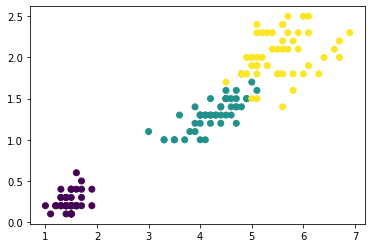

In [12]:
# graph showing differnce between PetalLengthCm and PetalWidthCm
plt.scatter(dt['PetalLengthCm'],dt['PetalWidthCm'],c=dt.Species.values)

We will compare this graph with our final one to check the accuracy of our model

In [13]:
# pairwise correlation of all columns in the dataframe
dt.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


**Step 3 - Visualisation of Data**

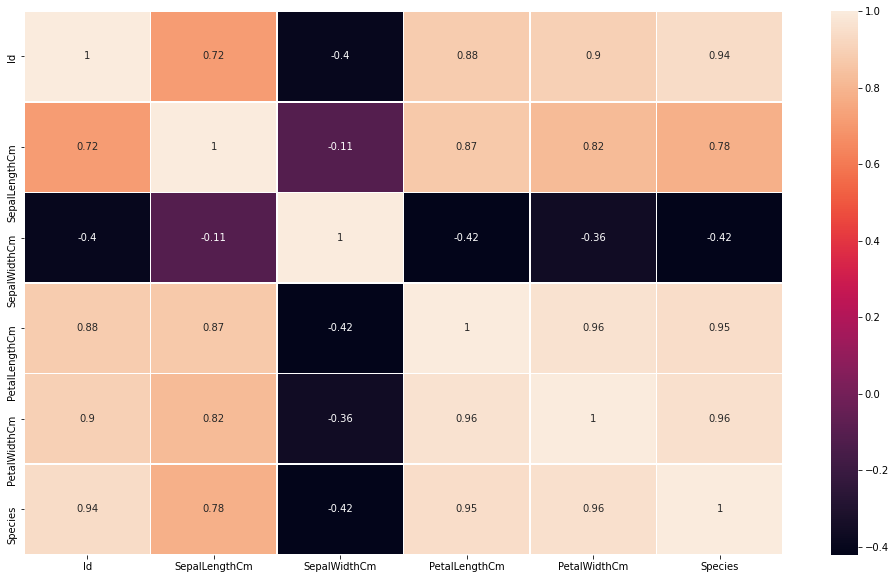

In [14]:
fig=plt.figure(figsize=(17,10))
sns.heatmap(dt.corr(),linewidths=0.5,annot=True)

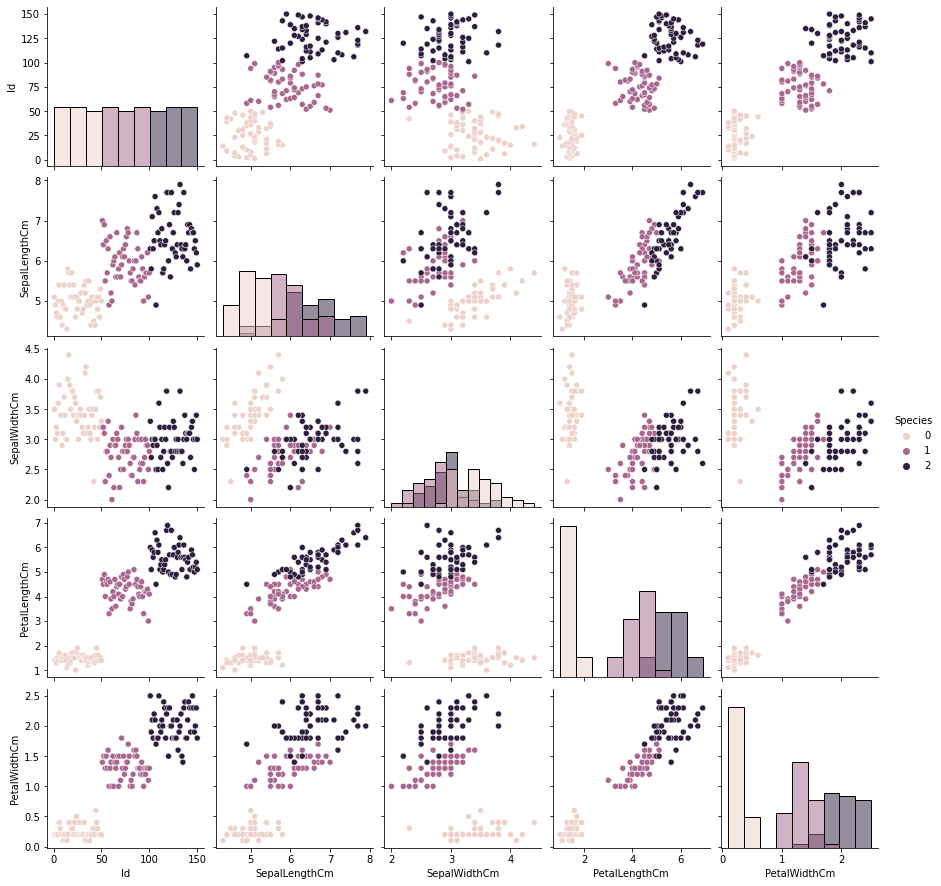

In [15]:
sns.pairplot(dt,hue='Species',diag_kind="hist")

Thus, species are mainly depend on petal length and petal width

In [16]:
dt=dt.iloc[:,[0,1,2,3]].values

**Step 4 - Finding the optimum number of clusters for k-means classification**

Elbow Method using wcss(within-cluster-sum-of-squares)

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dt)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17762.657226173542,
 11422.766542825364,
 7919.4684230769235,
 5908.7851201769245,
 4583.154474101921,
 3558.035245098039,
 2954.067607142857]

Finding number of Clusters using Elbow Graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


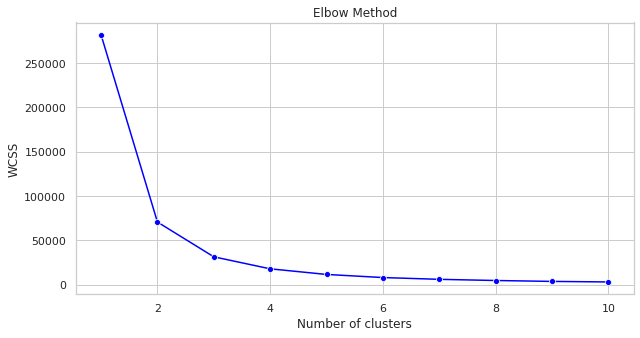

In [18]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

**Step 5 - Intializing using K-means**

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(dt)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Step 6 - Visualising the Clusters**

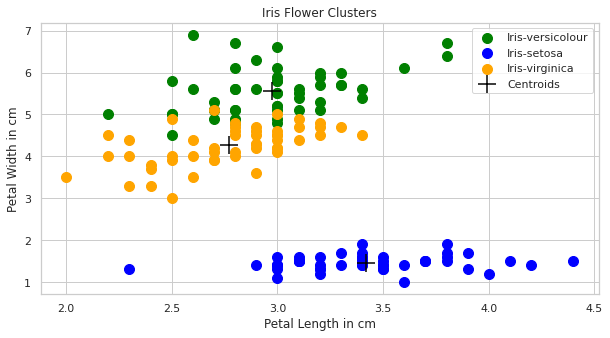

In [20]:
fig = plt.figure(figsize=(10, 5))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(dt[y_kmeans == 0, 2], dt[y_kmeans == 0, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(dt[y_kmeans == 1, 2], dt[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(dt[y_kmeans == 2, 2], dt[y_kmeans == 2, 3],s = 100, c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'black',marker='+', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

Hence we can see that our predicted graph is quite similar to the actual one.